# Exploring IGS Poll Data in Python
<pre>
</pre>

Between April 16 and 20, 2020 the [Institute of Governmental Studies (IGS)](https://www.igs.berkeley.edu), in conjunction with the [California Institute of Health Equity and Action(Cal-IHEA)](https://publichealth.berkeley.edu/research/centers/california-initiative-for-health-equity-action), polled 8,800 registered voters about a variety of issues concerning the current state of politics and COVID-19.  This was an unprecendented and urgently needed pulse-taking of the California populace during the pandemic. 

Below we provide an overview of the IGS Poll and describe how key findings from this survey can be found in the **IGS Poll Reports** while the data itself is made available by the **D-Lab**.

We then provide a short tutorial on how to access and explore the IGS Poll data in Python.

## Introduction

### About The IGS Poll

The [Berkeley IGS Poll](https://www.igs.berkeley.edu/research/berkeley-igs-poll) is a periodic survey of California public opinion on important matters of politics, public policy, and public issues. The poll, which is disseminated widely, seeks to provide a broad measure of contemporary public opinion, and to generate data for subsequent scholarly analysis. IGS Polls have been distributed 2-4 times per year since 2015. 

The IGS Polls continue the tradition of the California Field Polls. The Field Poll, or the California Poll, was established in 1947 by [Mervin Field](https://en.wikipedia.org/wiki/Mervin_Field) and operated continuously as an independent, non-partisan, media-sponsored public opinion news service from 1946 - 2014. Prior to their discontinuation, IGS collaborated with the Field Poll on a number of polls in 2011 and 2012.


### IGS Poll Reports
IGS researchers analyze the reponses from each survey and publish summary reports of key findings. Typically many reports are produced per survey. Recent IGS Poll reports can be downloaded from [eScholarship](https://escholarship.org/uc/igs_poll). You can stay abreast of new IGS Polls and reports by using the form on the IGS website to join the [IGS mailing list](https://www.igs.berkeley.edu/about).

### Accessing the IGS and Field Poll Data
The [D-Lab](https://dlab.berkeley.edu) makes the IGS and Field Poll data available via [SDA](https://sda.berkeley.edu/). SDA, or `Survey Documentation and Analysis` is an online tool for survey data analysis that also provides a platform for managing the survey data files and related documentation and facilitating their download. SDA was developed at UC, Berkeley but since 2015 it has been managed and supported by the Institute for Scientific Analysis (ISA), a private, non-profit organization, under agreement with the University of California.

A complete list of the IGS and Field polls that are accessible via SDA can be found on the [D-Lab Data California Polls webpage](https://dlab.berkeley.edu/data-resources/california-polls).

# Tutorial

In this section, we will show you how to download data from SDA and then import into Python for a little exploratory data analysis and map making!

- [Access Survey Data in SDA ](#access-sda)
- [Download Survey Data from SDA](#download-sda)
- [Working with IGS Poll Data in Python](#igs-python)
- [Creating Tables from IGS Poll Data](#igs-tables)
- [Mapping IGS Poll Data with Geopandas](#igs-maps)
- [Making reusable code](#reusable-code)

### Import python libraries

Before we get into the weeds, let's import the libraries we will use.

In [1]:
import numpy as np
import pandas as pd

import matplotlib # primary python plotting library
%matplotlib inline  
import matplotlib.pyplot as plt # more plotting stuff

import requests 
from urllib.request import urlopen, Request

import json # for working with JSON data
import geojson # ditto for GeoJSON data - an extension of JSON with support for geographic data
import geopandas as gpd # THE python package for working with vector geospatial data

import pyreadstat # for working with proprietary statistical software data formats


<a id="access-sda"></a>
## Accessing a Survey in SDA

The SDA tool can be used to access the IGS COVID-19 Poll data from April 2020 as well as any other IGS Poll data. If we check the D-Lab California Poll page, we see that the SDA URL for this poll is https://sda.berkeley.edu/sdaweb/analysis/?dataset=IGS_2020_03

Clicking that link opens the SDA landing page for the survey which contains a number of tools for online analysis as well as a left-side panel describing the available variables. The [SDA Help link](https://sda.berkeley.edu/sdaweb/helpfiles/help.htm) provides documentation for doing online analysis.

> Take a minute to notice the buttons for `downloading the data` or `a custom subset` and for accessing the `codebook (metadata)` both of which are highlighted in the screenshot below.

<img src="images/poll1.png">

<a id="download-sda"></a>
## Downloading Data from SDA

If you click on the `Download Static Files` link you will be able to download the IGS Poll data as a fixed-width text file by clicking on the **Data file** button.  To make sense of that file you need to download a data definition file as well.

<img src="images/poll2.png">

The **DDI data definitions** file is a `XML` file that uses the open-source [Data Documentation Initiative](https://en.wikipedia.org/wiki/Data_Documentation_Initiative) specification for survey metadata. You can use the DDI file with the data file to read the data directly into Python. However, this method requires knowledge of reading in fixed width files and extracting structured data from an XML file.

Alternatively, you can download a software specific `data definition file` that allows you to import the data into statistical software like `SPSS` or `Stata`. 

### Download SDA File for SPSS 

For this tutorial go ahead and download the IGS Poll data in SDA so that you can import it in SPSS and then save it as a `*.SAV` file. 

1. Download the `Data File`
1. Download the `SPSS data definition file`
1. Download the `codebook`

Follow the instructions in this [online PDF](http://web.pdx.edu/~stipakb/download/Data/SDA_data_to_SPSS.pdf) to import into the data and ddl file into SPSS and save as an SPSS `sav` file. You can search online for other documentation on process.


<a id="igs-python"></a>
## Working with the IGS Poll Data in Python


If you want to read in a proprietary statistical data file (SPSS or SAS etc) into Python you can use the [pyreadstat](https://github.com/Roche/pyreadstat) package or similar. This process is detailed in the excellent blogpost [How To Analyze Survey Data With Python](https://towardsdatascience.com/how-to-analyze-survey-data-with-python-84eff9cc9568), by Benedikt Droste (7/21/2019). 

We will draw from and expand the work in that blog post below.

###  Read in SPSS file

Use `pyreadstat.read_sav` to read in the SPSS file created from the SDA output. As you recall SDA produced a data file and a data definition file (DDL). The contents of both of these are in the SPSS sav file `igs-covid-poll-april2020_withlabels.sav`. When we read this file in the function returns both a pandas dataframe (df) from the data file and a metadata object from the DDL file.

> **Follow along**: The notebook and data for this tutorial can be found [here](https://github.com/dlab-geo/igspoll-processing-in-python).

In [2]:
# Read in the data into df and the detailed column metadata into meta
df, meta = pyreadstat.read_sav('data/igs-covid-poll-april2020_withlabels.sav')

First, take a look at the dataframe

In [3]:
df.head()

,CASEID,lang,consent,q1,q2,q3,q4_1,q4_1_20_text,q4_2,q4_2_20_text,...,q65,q66,q67,party,f20,rzip,age_group,county,region,w1
0,1.0,1.0,1.0,42.0,1.0,4,NA,,NA,,...,2,9,2,D,A,94706.0,x36_45,alameda,bay area,0.571025
1,2.0,1.0,1.0,30.0,1.0,1,13,,NA,,...,2,5,9,D,P,94610.0,x26_35,alameda,bay area,0.395032
2,3.0,1.0,1.0,31.0,1.0,1,1,,NA,,...,2,9,9,D,N,94609.0,x26_35,alameda,bay area,0.475997
3,4.0,1.0,1.0,33.0,1.0,1,20,tech ops,NA,,...,2,5,10,D,A,94608.0,x26_35,alameda,bay area,0.565656
4,5.0,1.0,1.0,37.0,1.0,1,14,,NA,,...,1,9,9,D,A,94605.0,x36_45,alameda,bay area,0.398781


The **meta** object is a `pyreadstat` object that contains, among other things:

- `meta.column_names` - A list of the column names 


- `meta.column_labels` - A list of the descriptive column labels


- `meta.variable_value_labels` - a dict of dicts - column name keys and a mapping of response codes and values.

In [4]:
# Take a look at the first ten values of
# meta.column_names - A list of the column names
meta.column_names[0:10]

['CASEID',
 'lang',
 'consent',
 'q1',
 'q2',
 'q3',
 'q4_1',
 'q4_1_20_text',
 'q4_2',
 'q4_2_20_text']

In [5]:
# Take a look at the first ten values of
# meta.column_labels - A list of the descriptive column labels
meta.column_labels[0:10]

['ID',
 'Language of survey',
 'Consent',
 'Q1 What is your age?',
 'Q2 What county do you reside in?',
 'Q3 Are you currently working?',
 'Q4_1 In what industry do you work?',
 'Q4_1 In what industry do you work - other text input',
 'Q4_2 In what industry were you most recently employed?',
 'Q4_2 In what industry were you most recently employed - other text input']

In [6]:
# Take a look at an example dict from
# meta.variable_value_labels
meta.variable_value_labels['q3']

{'1': 'Yes', '2': 'No, Unemployed', '3': 'No, Retired', '4': 'No, Student'}

For convenience, let's read the two column lists into one `meta_dict` so that we can easily retrieve the column label from the column name.

Let's also create a shorter alias `response_dict` for the variable value labels dict of dicts.

In [7]:
# convert metato a dictionary of column name and label pairs
meta_dict =     dict(zip(meta.column_names, meta.column_labels))
response_dict =  meta.variable_value_labels

As an example of how we would use this, let's get the full text label for the column named `Q23`.

In [8]:
meta_dict['q23']

'Q23 To what extent do you agree or disagree with the following statement: A single-payer health care system, such as... would improve the nation’s ability to respond to disasters and pandemics such as COVID-19.'

Wow, that's a long column label! Given this we won't replace the column names with the descriptive column labels. Instead we will just fetch them from the meta_dict when we need them.  


Now let's look at the range of responses for this question.
- This will display the code and the label for the response.

In [9]:
response_dict['q23']

{'1': 'Strongly Agree',
 '2': 'Somewhat Agree',
 '3': 'Neither agree nor disagree',
 '4': 'Somewhat Disagree',
 '5': 'Strongly Disagree'}

You can use a `list comprehension` to quickly search the meta_dict for columns (key) whose descriptive labels (val) have a specific string.

For example, let's identify columns that might relate to `health care`.

In [10]:
#Search for questions that mention masks
[(key, val) for key, val in meta_dict.items() if 'health' in val.lower()]

[('q10_5',
  'Q10_5 To what extent is COVID-19 a threat to your personal / family health?'),
 ('q19_1_6',
  'Q19_6 In your opinion, how effective are the following for preventing a person from getting COVID-19: Eating a healthy diet'),
 ('q23',
  'Q23 To what extent do you agree or disagree with the following statement: A single-payer health care system, such as... would improve the nation’s ability to respond to disasters and pandemics such as COVID-19.'),
 ('q25_4',
  'Q25_4 To what extent do you trust the following entities to provide accurate information about COVID-19: State and local public health agencies (state and/or local health department)'),
 ('q25_5',
  'Q25_5 To what extent do you trust the following entities to provide accurate information about COVID-19: World Health Organization (WHO)'),
 ('q25_7',
  'Q25_7 To what extent do you trust the following entities to provide accurate information about COVID-19: My personal physician/health care provider'),
 ('q31_8',
  'Q31_8

> That's pretty handy! But you should always refer back to the `codebook` you downloaded from SDA if one was available.

Let's take a deep dive into **Q23** since the results for this question were summarized in the IGS Poll Report:

> Mora, G., Schickler, E., Haro, A., & Rodriguez, H. (2020). Release #2020-10: Support for a Single-Payer Health Care System to Address Disasters & Pandemics. UC Berkeley: Institute of Governmental Studies. Retrieved from https://escholarship.org/uc/item/1n25x39s

In [11]:
meta_dict['q23']

'Q23 To what extent do you agree or disagree with the following statement: A single-payer health care system, such as... would improve the nation’s ability to respond to disasters and pandemics such as COVID-19.'

If we look at the `value_counts` for this column we get the distribution of counts across the response options.

In [12]:
df['q23'].value_counts(dropna=False)

1     3533
2     1776
5     1600
3     1321
4      551
NA       4
Name: q23, dtype: int64

We can normalize the output of `value_counts` to get the proportion of responses for each value.

In [13]:
df['q23'].value_counts(normalize=True)

1     0.402163
2     0.202163
5     0.182129
3     0.150370
4     0.062721
NA    0.000455
Name: q23, dtype: float64

Now let's use the `response_dict` to display human readable response values.

In [14]:
df['q23'].map(response_dict['q23']).value_counts(normalize=True)

Strongly Agree                0.402346
Somewhat Agree                0.202255
Strongly Disagree             0.182212
Neither agree nor disagree    0.150438
Somewhat Disagree             0.062749
Name: q23, dtype: float64

<a id="igs-tables"></a>
## Creating Tables from IGS Poll Data

We can up our game by creating a `pandas crosstab` to see how the responses vary by another variable. Here let's consider the political party of the survey respondent, which is in `q9`.

In [15]:
meta_dict['q9']

'Q9 Generally speaking in politics do you think of yourself as a Democrat, Republican, Independent or something else?'

In [16]:
pd.crosstab(df['q23'], df['q9'], dropna=True, normalize='columns')

q9,1,2,3,4,NA
q23,,,,,
1,0.540479,0.070073,0.323103,0.453471,0.285714
2,0.257013,0.078102,0.188406,0.147710,0.000000
3,0.142759,0.138686,0.171355,0.147710,0.428571
4,0.039225,0.105109,0.086104,0.048744,0.000000
5,0.020296,0.608029,0.230179,0.202363,0.142857
NA,0.000228,0.000000,0.000853,0.000000,0.142857


Add we can pretty up the formatting of the output..

In [17]:
pd.crosstab(df['q23'], df['q9'], dropna=True, normalize='columns').style.format("{:0.2f}")

q9,1,2,3,4,NA
q23,,,,,
1,0.54,0.07,0.32,0.45,0.29
2,0.26,0.08,0.19,0.15,0.00
3,0.14,0.14,0.17,0.15,0.43
4,0.04,0.11,0.09,0.05,0.00
5,0.02,0.61,0.23,0.20,0.14
NA,0.00,0.00,0.00,0.00,0.14


Above, we normalized by `column` so that the column values would add up to 1 (or 100% if converted to percents).


Let's bring it home by adding pretty column labels and response labels.

In [18]:
pd.crosstab(
        df['q23'].map(response_dict['q23']), # The response values for q23 
        df['q9'].map(response_dict['q9']),   # The response values for q9  
        dropna=True, normalize='columns'). \
        style.format("{:0.2f}")              # and format the output

q9,Democrat,Independent,Republican,Something else
q23,,,,
Neither agree nor disagree,0.14,0.17,0.14,0.15
Somewhat Agree,0.26,0.19,0.08,0.15
Somewhat Disagree,0.04,0.09,0.11,0.05
Strongly Agree,0.54,0.32,0.07,0.45
Strongly Disagree,0.02,0.23,0.61,0.20


We can also reorder the rows so that they align with the original order of the responses.

Let's do that and save the output to a dataframe named `q23_table`.

In [19]:
q23_table = pd.crosstab(
        df['q23'].map(response_dict['q23']), # The response values for q23 
        df['q9'].map(response_dict['q9']),   # The response values for q9  
        dropna=True, normalize='columns').  \
        loc[response_dict['q23'].values()]. \
        loc[:,response_dict['q9'].values()] 

In [20]:
q23_table

q9,Democrat,Republican,Independent,Something else
q23,,,,
Strongly Agree,0.540602,0.070073,0.323379,0.453471
Somewhat Agree,0.257071,0.078102,0.188567,0.147710
Neither agree nor disagree,0.142792,0.138686,0.171502,0.147710
Somewhat Disagree,0.039234,0.105109,0.086177,0.048744
Strongly Disagree,0.020301,0.608029,0.230375,0.202363


Now that we have saved the table as a dataframe let's do a bit more reformatting.

In [21]:
# Since all the row values are numeric let's convert to percents and round
q23_table = round(q23_table*100, 2)

# Move the responses to a column instead of an index
q23_table.reset_index(inplace=True)

# Remove the name of the column - set to empty string
q23_table.rename(columns={'q23':''},inplace=True)

# Rename the axis to default value of none
q23_table.rename_axis(None, inplace=True, axis=1)

# Take a look
q23_table

,,Democrat,Republican,Independent,Something else
0,Strongly Agree,54.06,7.01,32.34,45.35
1,Somewhat Agree,25.71,7.81,18.86,14.77
2,Neither agree nor disagree,14.28,13.87,17.15,14.77
3,Somewhat Disagree,3.92,10.51,8.62,4.87
4,Strongly Disagree,2.03,60.80,23.04,20.24


Let's see how that output compares to **Table 1** of the IGS Report:
> Mora, G., Schickler, E., Haro, A., & Rodriguez, H. (2020). Release #2020-10: Support for a Single-Payer Health Care System to Address Disasters & Pandemics. UC Berkeley: Institute of Governmental Studies. Retrieved from https://escholarship.org/uc/item/1n25x39s

> <img src="images/Table1.png" width="75%" align="left"></img>


You can see that our values do not match. This is because we are not including the survey weights.

Let's weight the values, which are in the column `w1`, and then compare the tables again.

In [22]:
q23_table_weighted = pd.crosstab(
        df['q23'].map(response_dict['q23']), # The response values for q23 
        df['q9'].map(response_dict['q9']),   # The response values for q9  
        df['w1'], aggfunc = sum,
        dropna=True, normalize='columns').  \
        loc[response_dict['q23'].values()]. \
        loc[:,response_dict['q9'].values()] 

q23_table_weighted
# Since all the row values are numeric let's convert to percents and round
q23_table_weighted = round(q23_table_weighted*100, 2)

# Move the responses to a column instead of an index
q23_table_weighted.reset_index(inplace=True)

# Remove the name of the column - set to empty string
q23_table_weighted.rename(columns={'q23':''},inplace=True)


# Rename the axis to default value of none
q23_table_weighted.rename_axis(None, inplace=True, axis=1)

# Take a look
q23_table_weighted

,,Democrat,Republican,Independent,Something else
0,Strongly Agree,51.60,7.73,29.82,38.64
1,Somewhat Agree,24.82,8.40,19.98,17.15
2,Neither agree nor disagree,17.07,14.47,18.21,17.85
3,Somewhat Disagree,3.97,10.10,8.93,3.78
4,Strongly Disagree,2.54,59.30,23.07,22.58


Now we have matching output!

<a id="igs-maps"></a>
## Mapping IGS Poll Data

In the next section of our tutorial we will show you how to map the survey response data.

For this, we will:

- Read in the USA County cartography boundary file from the Census website.
- Subset it to include only California Counties
- Subset the survey data to keep only `q23` responses by `q2` - which is the respondent's county.
- Join the survey subset to the county data
- Map it.

We will use the `Geopandas` library to work with and map the geographic data.

Fetch the county boundary data and take a look.

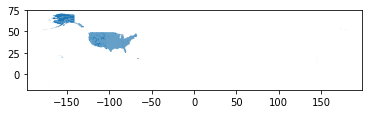

In [23]:
counties = "https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_county_500k.zip"
counties = gpd.read_file(counties)
counties.plot()

Take a look at the county data so we can find a column on which to subset by state.

In [24]:
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,48,081,01383826,0500000US48081,48081,Coke,06,2361153195,42331832,"POLYGON ((-100.82497 31.74941, -100.82415 31.8..."
1,48,273,01383922,0500000US48273,48273,Kleberg,06,2282572445,541041659,"MULTIPOLYGON (((-97.31780 27.49456, -97.31590 ..."
2,48,203,01383887,0500000US48203,48203,Harrison,06,2331138836,40651525,"POLYGON ((-94.70215 32.45618, -94.70197 32.467..."
3,48,223,01383897,0500000US48223,48223,Hopkins,06,1987629163,65639829,"POLYGON ((-95.86333 33.04989, -95.86302 33.065..."
4,48,033,01383802,0500000US48033,48033,Borden,06,2324366073,22297606,"POLYGON ((-101.69128 32.96184, -101.55743 32.9..."


Use the California state fips code **06*8 to subset the county data.

In [25]:
counties = counties[counties['STATEFP']=='06'].reset_index(drop=True)

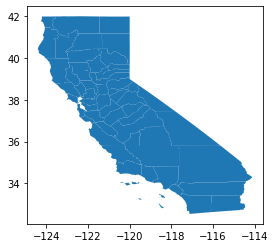

In [26]:
counties.plot()

In [27]:
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,001,01675839,0500000US06001,06001,Alameda,06,1909614756,216907015,"POLYGON ((-122.34225 37.80556, -122.33412 37.8..."
1,06,061,00277295,0500000US06061,06061,Placer,06,3644306246,246466620,"POLYGON ((-121.48444 38.75135, -121.46980 38.7..."
2,06,037,00277283,0500000US06037,06037,Los Angeles,06,10511861492,1793485467,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
3,06,095,00277312,0500000US06095,06095,Solano,06,2128488719,218671901,"POLYGON ((-122.40348 38.15546, -122.38027 38.1..."
4,06,093,00277311,0500000US06093,06093,Siskiyou,06,16261933244,179149815,"POLYGON ((-123.71845 41.59796, -123.71880 41.5..."


Take a look at the `q2` descriptive label.

In [28]:
meta_dict['q2']

'Q2 What county do you reside in?'

Take a look at the set of responses for this question.

In [29]:
response_dict['q2']

{1.0: 'Alameda',
 2.0: 'Alpine',
 3.0: 'Amador',
 4.0: 'Butte',
 5.0: 'Calaveras',
 6.0: 'Colusa',
 7.0: 'Contra Costa',
 8.0: 'Del Norte',
 9.0: 'El Dorado',
 10.0: 'Fresno',
 11.0: 'Glenn',
 12.0: 'Humboldt',
 13.0: 'Imperial',
 14.0: 'Inyo',
 15.0: 'Kern',
 16.0: 'Kings',
 17.0: 'Lake',
 18.0: 'Lassen',
 19.0: 'Los Angeles',
 20.0: 'Madera',
 21.0: 'Marin',
 22.0: 'Mariposa',
 23.0: 'Mendocino',
 24.0: 'Merced',
 25.0: 'Modoc',
 26.0: 'Mono',
 27.0: 'Monterey',
 28.0: 'Napa',
 29.0: 'Nevada',
 30.0: 'Orange',
 31.0: 'Placer',
 32.0: 'Plumas',
 33.0: 'Riverside',
 34.0: 'Sacramento',
 35.0: 'San Benito',
 36.0: 'San Bernardino',
 37.0: 'San Diego',
 38.0: 'San Francisco',
 39.0: 'San Joaquin',
 40.0: 'San Luis Obispo',
 41.0: 'San Mateo',
 42.0: 'Santa Barbara',
 43.0: 'Santa Clara',
 44.0: 'Santa Cruz',
 45.0: 'Shasta',
 46.0: 'Sierra',
 47.0: 'Siskiyou',
 48.0: 'Solano',
 49.0: 'Sonoma',
 50.0: 'Stanislaus',
 51.0: 'Sutter',
 52.0: 'Tehama',
 53.0: 'Trinity',
 54.0: 'Tulare',
 55.0

Now we want to create the data that we wish to map using `pd.crosstab`.

We want the responses to Question 23 (`q23`) as the columns and those for Q2-county (`q21`) as our rows. Thus the ouput will look a little different.

> **IMPORTANT:** Because we want the values for q23 to sum to 1 (or 100 for percentages) for each county, we now want to `normalize` by rows (or **index**) not by column as we did previously.

In [30]:
# Need to set normalize to 'index' to get correct values by county
q23_by_county = pd.crosstab(
                    df['q2'].map(response_dict['q2']),  
                    df['q23'].map(response_dict['q23']), 
                    df.w1, aggfunc = sum, dropna=True,  
                    normalize='index')

q23_by_county =  round(q23_by_county * 100, 2) # convert to percents and round
q23_by_county.reset_index(inplace=True)

q23_by_county.head()

q23,q2,Neither agree nor disagree,Somewhat Agree,Somewhat Disagree,Strongly Agree,Strongly Disagree
0,Alameda,16.36,22.20,4.34,42.71,14.38
1,Amador,10.20,34.42,0.00,37.01,18.37
2,Butte,9.67,12.82,3.29,23.04,51.18
3,Calaveras,33.49,0.00,0.00,37.17,29.34
4,Colusa,0.00,0.00,13.86,86.14,0.00


Next, we use the Geopandas `geodataframe merge` method to join the survey data to the county boundaries. 

- Our join values will be the county names which are in the `q2` column of the q23_by_county dataframe and in the `NAME` column of the counties geodataframe.
- We do a "left" join to keep all the rows in the left table - here the `counties` geodataframe.

In [31]:
counties_q23 = counties.merge(q23_by_county, left_on="NAME", right_on="q2", how="left")

If you take a look at the output geodataframe you can see the responses to `q23` have been appended to the rows for each county.

In [32]:
counties_q23.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,q2,Neither agree nor disagree,Somewhat Agree,Somewhat Disagree,Strongly Agree,Strongly Disagree
0,06,001,01675839,0500000US06001,06001,Alameda,06,1909614756,216907015,"POLYGON ((-122.34225 37.80556, -122.33412 37.8...",Alameda,16.36,22.20,4.34,42.71,14.38
1,06,061,00277295,0500000US06061,06061,Placer,06,3644306246,246466620,"POLYGON ((-121.48444 38.75135, -121.46980 38.7...",Placer,18.59,21.25,7.60,22.62,29.94
2,06,037,00277283,0500000US06037,06037,Los Angeles,06,10511861492,1793485467,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",Los Angeles,16.91,19.85,6.15,42.28,14.81
3,06,095,00277312,0500000US06095,06095,Solano,06,2128488719,218671901,"POLYGON ((-122.40348 38.15546, -122.38027 38.1...",Solano,21.35,21.92,7.46,26.82,22.46
4,06,093,00277311,0500000US06093,06093,Siskiyou,06,16261933244,179149815,"POLYGON ((-123.71845 41.59796, -123.71880 41.5...",Siskiyou,45.73,0.00,14.21,30.16,9.90


Now we will use `matplotlib` and `geopandas` to map of one column in the output table counties_q23: **Strongly Agree**, or the percent of those who strongly agree with the question.

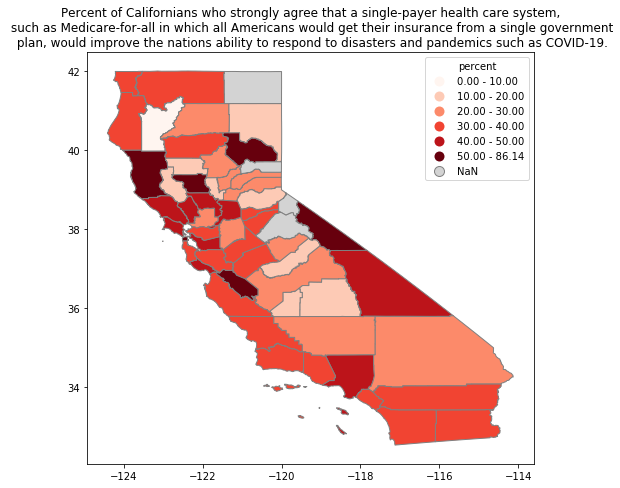

In [33]:
fig, ax = plt.subplots(figsize = (8,10)) 
counties_q23.plot(column='Strongly Agree', 
                  scheme='user_defined',
                  cmap="Reds",
                  edgecolor="grey",
                  classification_kwds={'bins':[10,20,30,40,50]},
                  legend=True,
                  legend_kwds={'title':'percent'},
                  missing_kwds= dict(color = "lightgrey"),
                  ax=ax)
ax.set_title("Percent of Californians who strongly agree that a single-payer health care system,\n such as Medicare-for-all in which all Americans would get their insurance from a single government\n plan, would improve the nations ability to respond to disasters and pandemics such as COVID-19.")
plt.show()             

That map reveals some potentially interesting regional differences that could be worth investigating further. They may also be an artifact of few survey responses in those particular counties.

<a id="reusable-code"></a>
## Making Reusable code

Finally, we can leverage our code to create functions so that we can map any question response by county.

> For those of you who work with geographic data, you will see that I added a named argument `map_crs` to the function with a default value for California. This allows one to set the map project of the output map to create a more custom look.

In [34]:
def make_county_map(gdf, column_name_str, title="no_title", map_crs='epsg:3310'):
    '''
    Create a map by county of any column in a geodataframe
    '''
    fig, ax = plt.subplots(figsize = (8,10)) 
    gdf.to_crs(map_crs).plot(column=column_name_str, 
                  scheme='user_defined',
                  cmap="Reds",
                  edgecolor="grey",
                  classification_kwds={'bins':[10,20,30,40,50]},
                  legend=True,
                  legend_kwds={'title':'percent'},
                  missing_kwds= dict(color = "lightgrey"),
                  ax=ax)
    ax.set_title(title)
    
    # Remove axis clutter
    ax.set_axis_off()
plt.show()

Test our function with the geodataframe and column we just used.

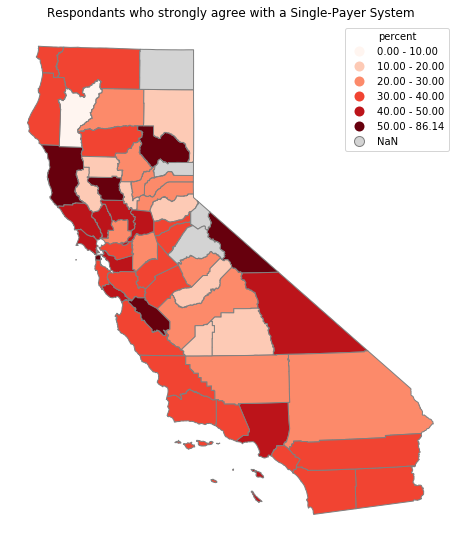

In [35]:
make_county_map(counties_q23,'Strongly Agree', 'Respondants who strongly agree with a Single-Payer System')

Now let's create a function to create the geodataframe so we can make a map for any question-response pair.

In [36]:
def make_county_gdf(column_name_str):
    
    tempdf = pd.crosstab(
                df['q2'].map(response_dict['q2']), 
                df[column_name_str].map(response_dict[column_name_str]), 
                df.w1, aggfunc = sum, dropna=True,
                normalize='index')

    tempdf =  round(tempdf * 100, 2) # convert to percents and round
    tempdf.reset_index(inplace=True)
    county_gdf = counties.merge(tempdf, left_on="NAME", right_on="q2", how="left")
    return county_gdf

Let's map the percent of folks who responded that mask usage is very effective for preventing COVID-19.


In [37]:
# Search for questions that mention masks
[(key, val) for key, val in meta_dict.items() if 'mask' in val.lower()]

[('q19_1_3',
  'Q19_3 In your opinion, how effective are the following for preventing a person from getting COVID-19: Wearing a mask'),
 ('q19',
  'Q19 To what extent do you agree or disagree with the following statement: My employer provides the personal protective equipment (PPE) that I need to do my job safely. For example, masks, gloves, etc.')]

**q19_1_3** looks good. Let's take a look at the response values for that question.

In [38]:
response_dict['q19_1_1']

{'1': 'Extremely effective',
 '2': 'Somewhat effective',
 '3': 'Not effective at all',
 '4': 'Not sure'}

Let's map that!

In [39]:
my_gdf = make_county_gdf('q19_1_3')

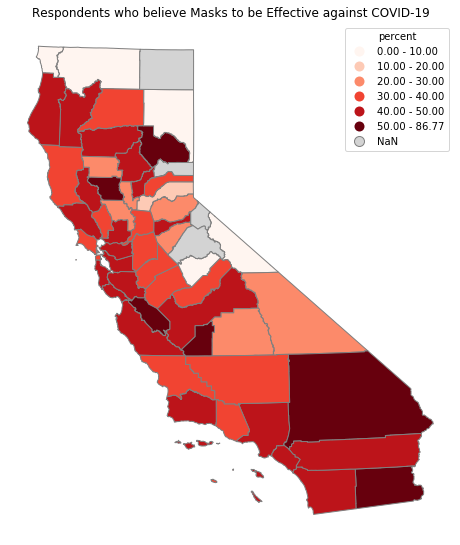

In [40]:
make_county_map(my_gdf,'Extremely effective', 'Respondents who believe Masks to be Effective against COVID-19')

That worked! Yeh.

Now let's flip that so we can see the geographic distribution of responses where masks are thought to be not effective.

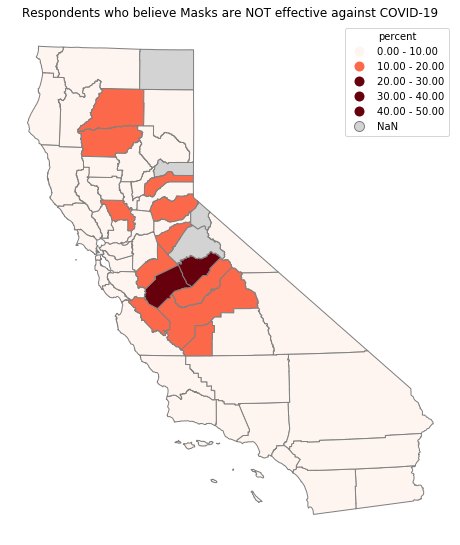

In [41]:
my_gdf = make_county_gdf('q19_1_3')
make_county_map(my_gdf,'Not effective at all', 'Respondents who believe Masks are NOT effective against COVID-19')

# Parting thoughts


As you can see, there is a lot of interesting data collected by the IGS Polls and some great libraries for exploring these data in Python.  If you are interested in these data, sign up for the [IGS mailing list](https://www.igs.berkeley.edu/about)) and keep your eyes on the D-Lab California Polls web page(https://dlab.berkeley.edu/data-resources/california-polls).

If you are looking to develop your data science skills, check out the [D-Lab web site](https://dlab.berkeley.edu/). Better yet, join our newsletter as well and stay abreast of the upcoming workshops as we get ready for the Fall 2020 semester.